In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
roc_auc_score, roc_curve, confusion_matrix, cohen_kappa_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.pipeline import Pipeline
import os
import joblib

# Data Preprocessing

In [4]:
data = pd.read_csv('pd_speech_features.csv', skiprows=1)
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [6]:
# Check missing value
data.isnull().sum().sum()

0

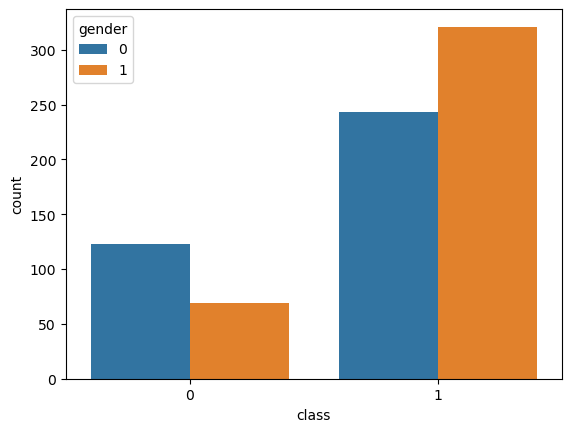

In [7]:
sns.countplot(x='class', hue='gender', data=data)
plt.show()

In [8]:
def split_data_by_id(data, test_size=0.3, random_state=None):
    unique_ids = data['id'].unique()

    train_ids, test_ids = train_test_split(unique_ids, test_size=test_size, random_state=random_state)

    train_data = data[data['id'].isin(train_ids)]
    test_data = data[data['id'].isin(test_ids)]
    
    return train_data, test_data

train_data, test_data = split_data_by_id(data, test_size=0.3, random_state=19260817)

train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])


print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (528, 754)
Test Data Shape: (228, 754)


In [9]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [10]:
y_train.sum()/y_train.count(), y_test.sum()/y_test.count()

(0.7443181818181818, 0.75)

In [11]:
# # Split dataset
# X = data.iloc[:,:-1]
# y = data.iloc[:,-1]
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify = y, random_state = 42)

# print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
# print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train, X_test = X_train_scaled, X_test_scaled

# Model

In [14]:
def print_grid_search(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

def get_metrics(model, mode = 'test'):
    if mode == 'train':
        X, y = X_train, y_train
    elif mode == 'test':
        X, y = X_test, y_test
    results = {}
    y_pred = model.predict(X)
    y_pred_prob = model.predict_proba(X)[:, 1]
    results['Accuracy'] = accuracy_score(y, y_pred)
    results['Precision'] = precision_score(y, y_pred)
    results['Recall'] = recall_score(y, y_pred)
    results['F1'] = f1_score(y, y_pred)
    # results['kappa'] = cohen_kappa_score(y, y_pred)
    results['AUC'] = roc_auc_score(y, y_pred_prob)
    return results

# def get_metrics_new(model, mode = 'test'):
#     if mode == 'train':
#         X, y = X_train_new, y_train
#     elif mode == 'test':
#         X, y = X_test_new, y_test
#     results = {}
#     y_pred = model.predict(X)
#     y_pred_prob = model.predict_proba(X)[:, 1]
#     results['accuracy'] = accuracy_score(y, y_pred)
#     results['precision'] = precision_score(y, y_pred)
#     results['recall'] = recall_score(y, y_pred)
#     results['f1'] = f1_score(y, y_pred)
#     # results['kappa'] = cohen_kappa_score(y, y_pred)
#     results['auc'] = roc_auc_score(y, y_pred_prob)
#     return results

def get_results(model):
    res1, res2 = get_metrics(model, mode='train'), get_metrics(model, mode='test')
    print(f'Train:\n{res1}')
    print(f'Test:\n{res2}')
    return res1, res2

# def get_results_new(model):
#     res1, res2 = get_metrics_new(model, mode='train'), get_metrics_new(model, mode='test')
#     print(f'Train:\n{res1}')
#     print(f'Test:\n{res2}')
#     return res1, res2

def get_coma(model):
    X, y = X_test, y_test
    y_pred = model.predict(X)
    return confusion_matrix(y, y_pred)

## Logistic Regression

In [16]:
params = {
    'C': [0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2']
}
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear',random_state=42), params)
grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']})

In [17]:
print_grid_search(grid_lr)

Best score: 0.8200359389038635
Best parameters set:
C:0.1
penalty:l1


In [18]:
best_lr = grid_lr.best_estimator_
res_lr_train, res_lr_test = get_results(best_lr)

Train:
{'Accuracy': 0.9109848484848485, 'Precision': 0.9023255813953488, 'Recall': 0.9872773536895675, 'F1': 0.9428918590522479, 'AUC': 0.9601922533220243}
Test:
{'Accuracy': 0.881578947368421, 'Precision': 0.875, 'Recall': 0.9824561403508771, 'F1': 0.9256198347107438, 'AUC': 0.8766800041038267}


In [19]:
df_train_result = pd.DataFrame(res_lr_train, index=['Logistic Regression'])
df_test_result = pd.DataFrame(res_lr_test, index=['Logistic Regression'])

In [20]:
get_coma(best_lr)

array([[ 33,  24],
       [  3, 168]], dtype=int64)

## Decision Tree

In [22]:
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [23]:
print_grid_search(grid_dt)

Best score: 0.7632704402515724
Best parameters set:
criterion:entropy
min_samples_leaf:1
min_samples_split:5


In [24]:
best_dt = grid_dt.best_estimator_
res_dt_train, res_dt_test = get_results(best_dt)

Train:
{'Accuracy': 0.9943181818181818, 'Precision': 0.9974489795918368, 'Recall': 0.9949109414758269, 'F1': 0.9961783439490446, 'AUC': 0.9998209405334088}
Test:
{'Accuracy': 0.7149122807017544, 'Precision': 0.8011363636363636, 'Recall': 0.8245614035087719, 'F1': 0.8126801152737753, 'AUC': 0.603262542320714}


In [25]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_dt_train, index=['Decision Tree'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_dt_test, index=['Decision Tree'])], axis=0)

In [26]:
get_coma(best_dt)

array([[ 22,  35],
       [ 30, 141]], dtype=int64)

## Random Forest

In [28]:
params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['log2', 'sqrt', 1]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['log2', 'sqrt', 1],
                         'n_estimators': [100, 200, 300]})

In [29]:
print_grid_search(grid_rf)

Best score: 0.8125247079964062
Best parameters set:
max_features:log2
n_estimators:100


In [30]:
best_rf = grid_rf.best_estimator_
res_rf_train, res_rf_test = get_results(best_rf)

Train:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'AUC': 1.0}
Test:
{'Accuracy': 0.8421052631578947, 'Precision': 0.835820895522388, 'Recall': 0.9824561403508771, 'F1': 0.9032258064516129, 'AUC': 0.8499025341130604}


In [31]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_rf_train, index=['Random Forest'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_rf_test, index=['Random Forest'])], axis=0)

In [32]:
get_coma(best_rf)

array([[ 24,  33],
       [  3, 168]], dtype=int64)

## Gradient Boosting

In [34]:
params = {
    'n_estimators': [800],
    'learning_rate': [0.01, 0.02],
    'max_depth': [3, 5],
    'max_features': ['sqrt', 'log2']
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), params, cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'],
                         'n_estimators': [800, 1000]})

In [35]:
print_grid_search(grid_gb)

Best score: 0.8371248876909254
Best parameters set:
learning_rate:0.02
max_depth:3
max_features:log2
n_estimators:800


In [36]:
best_gb = grid_gb.best_estimator_
res_gb_train, res_gb_test = get_results(best_gb)

Train:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'AUC': 1.0}
Test:
{'Accuracy': 0.8640350877192983, 'Precision': 0.85, 'Recall': 0.9941520467836257, 'F1': 0.9164420485175202, 'AUC': 0.8825279573202011}


In [37]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_gb_train, index=['GBDT'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_gb_test, index=['GBDT'])], axis=0)

In [38]:
get_coma(best_gb)

array([[ 27,  30],
       [  1, 170]], dtype=int64)

## XGBoost

In [40]:
params = {
    'n_estimators': [1000],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_child_weight': [1],
    'gamma': [0, 0.1],
    'subsample': [0.9],
    'colsample_bytree': [0.3],
}
grid_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42), params, cv=5)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.3], 'gamma': [0, 0.1],
                         'learning_rate': [0.01], 'max_depth': [3],
                         'min_child_weight': [1], 'n_estimators': [1000],
                         'subsample': [0.9]})

In [41]:
print_grid_search(grid_xgb)

Best score: 0.8295417789757412
Best parameters set:
colsample_bytree:0.3
gamma:0.1
learning_rate:0.01
max_depth:3
min_child_weight:1
n_estimators:1000
subsample:0.9


In [42]:
best_xgb = grid_xgb.best_estimator_
res_xgb_train, res_xgb_test = get_results(best_xgb)

Train:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'AUC': 1.0}
Test:
{'Accuracy': 0.8728070175438597, 'Precision': 0.8622448979591837, 'Recall': 0.9883040935672515, 'F1': 0.9209809264305178, 'AUC': 0.888888888888889}


In [43]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_xgb_train, index=['XGBoost'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_xgb_test, index=['XGBoost'])], axis=0)

In [44]:
get_coma(best_xgb)

array([[ 30,  27],
       [  2, 169]], dtype=int64)

In [45]:
# feature_importances = best_xgb.feature_importances_
# sorted_indices = np.argsort(feature_importances)[::-1]
# cumulative_importance = np.cumsum(feature_importances[sorted_indices])
# desired_cumulative_importance = 0.90
# selected_indices = np.where(cumulative_importance <= desired_cumulative_importance)[0]
# X_train_new = X_train[:, sorted_indices[selected_indices]]
# X_test_new = X_test[:, sorted_indices[selected_indices]]

In [46]:
# params = {
#     'n_estimators': [500],
#     'learning_rate': [0.01, 0.02],
#     'max_depth': [3, 5],
#     'min_child_weight': [1, 3],
#     'gamma': [0, 0.1],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.1, 0.2, 0.3],
# }
# grid_xgb_new = GridSearchCV(xgb.XGBClassifier(random_state=42), params, cv=5)
# grid_xgb_new.fit(X_train_new, y_train)

In [47]:
# print_grid_search(grid_xgb_new)

In [48]:
# best_xgb_new = grid_xgb_new.best_estimator_
# res_xgb_new_train, res_xgb_new_test = get_results_new(best_xgb_new)

## LightGBM

In [51]:
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.2, 0.3, 0.4],
    'max_depth': [3],
    'num_leaves': [10],
    'subsample': [0.3, 0.5],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_lgb = GridSearchCV(lgb.LGBMClassifier(n_jobs=-1, verbose=-1), params, cv=5)
grid_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1, verbose=-1),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.2, 0.3, 0.4], 'max_depth': [3],
                         'n_estimators': [50, 100, 150], 'num_leaves': [10],
                         'subsample': [0.3, 0.5]})

In [52]:
print_grid_search(grid_lgb)

Best score: 0.8465768194070081
Best parameters set:
colsample_bytree:0.8
learning_rate:0.3
max_depth:3
n_estimators:100
num_leaves:10
subsample:0.3


In [53]:
best_lgb = grid_lgb.best_estimator_
res_lgb_train, res_lgb_test = get_results(best_lgb)

Train:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'AUC': 1.0}
Test:
{'Accuracy': 0.8771929824561403, 'Precision': 0.8704663212435233, 'Recall': 0.9824561403508771, 'F1': 0.9230769230769231, 'AUC': 0.8815020006155739}


In [54]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_lgb_train, index=['LightGBM'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_lgb_test, index=['LightGBM'])], axis=0)

In [55]:
get_coma(best_lgb)

array([[ 32,  25],
       [  3, 168]], dtype=int64)

## KNN

In [57]:
params = {
    'n_neighbors': [2, 3, 4],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_knn = GridSearchCV(KNeighborsClassifier(n_jobs=-1, algorithm='ball_tree'), params, cv=5)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1),
             param_grid={'n_neighbors': [2, 3, 4], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [58]:
print_grid_search(grid_knn)

Best score: 0.7898652291105122
Best parameters set:
n_neighbors:3
p:2
weights:uniform


In [59]:
best_knn = grid_knn.best_estimator_
res_knn_train, res_knn_test = get_results(best_knn)

Train:
{'Accuracy': 0.9734848484848485, 'Precision': 0.974937343358396, 'Recall': 0.989821882951654, 'F1': 0.9823232323232324, 'AUC': 0.9945151258128359}
Test:
{'Accuracy': 0.8508771929824561, 'Precision': 0.8624338624338624, 'Recall': 0.9532163742690059, 'F1': 0.9055555555555556, 'AUC': 0.7874217708012722}


In [60]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_knn_train, index=['KNN'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_knn_test, index=['KNN'])], axis=0)

In [61]:
get_coma(best_knn)

array([[ 31,  26],
       [  8, 163]], dtype=int64)

## SVM

In [63]:
params = {
    'C': [0.5, 1, 2],
    'gamma': ['scale', 'auto'],
}
grid_svm = GridSearchCV(SVC(random_state=42, probability=True), params, cv=5)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.5, 1, 2], 'gamma': ['scale', 'auto']})

In [64]:
print_grid_search(grid_svm)

Best score: 0.8370889487870621
Best parameters set:
C:2
gamma:auto


In [65]:
best_svm = grid_svm.best_estimator_
res_svm_train, res_svm_test = get_results(best_svm)

Train:
{'Accuracy': 0.9810606060606061, 'Precision': 0.9751861042183623, 'Recall': 1.0, 'F1': 0.9874371859296482, 'AUC': 0.9998492130807652}
Test:
{'Accuracy': 0.8552631578947368, 'Precision': 0.8520408163265306, 'Recall': 0.9766081871345029, 'F1': 0.9100817438692098, 'AUC': 0.8026059300297527}


In [66]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_svm_train, index=['SVM'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_svm_test, index=['SVM'])], axis=0)

In [67]:
get_coma(best_svm)

array([[ 28,  29],
       [  4, 167]], dtype=int64)

## Naive Bayes

In [69]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [70]:
res_nb_train, res_nb_test = get_results(nb)

Train:
{'Accuracy': 0.821969696969697, 'Precision': 0.8883116883116883, 'Recall': 0.8702290076335878, 'F1': 0.8791773778920309, 'AUC': 0.8129865234190934}
Test:
{'Accuracy': 0.8201754385964912, 'Precision': 0.8823529411764706, 'Recall': 0.8771929824561403, 'F1': 0.8797653958944281, 'AUC': 0.7941930850518109}


In [71]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_nb_train, index=['Naive Bayes'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_nb_test, index=['Naive Bayes'])], axis=0)

In [72]:
get_coma(best_svm)

array([[ 28,  29],
       [  4, 167]], dtype=int64)

## AdaBoost

In [74]:
best_ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=100,
    learning_rate=0.5, 
    random_state=42
).fit(X_train, y_train)

D:\Users\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [75]:
res_ada_train, res_ada_test = get_results(best_ada)

Train:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'AUC': 1.0}
Test:
{'Accuracy': 0.8771929824561403, 'Precision': 0.8783068783068783, 'Recall': 0.9707602339181286, 'F1': 0.9222222222222223, 'AUC': 0.8802708525700215}


In [76]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_ada_train, index=['AdaBoost'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_ada_test, index=['AdaBoost'])], axis=0)

In [77]:
get_coma(best_ada)

array([[ 34,  23],
       [  5, 166]], dtype=int64)

## MLP

In [79]:
mlp_model = MLPClassifier(random_state=42, hidden_layer_sizes=(512,256,128), learning_rate_init=0.001)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(512, 256, 128), random_state=42)

In [80]:
res_mlp_train, res_mlp_test = get_results(mlp_model)

Train:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'AUC': 1.0}
Test:
{'Accuracy': 0.881578947368421, 'Precision': 0.8870967741935484, 'Recall': 0.9649122807017544, 'F1': 0.9243697478991597, 'AUC': 0.8460038986354776}


In [81]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_mlp_train, index=['MLP'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_mlp_test, index=['MLP'])], axis=0)

In [82]:
get_coma(mlp_model)

array([[ 36,  21],
       [  6, 165]], dtype=int64)

## Stacking

In [165]:
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, gamma='auto', random_state=42))
]
final_estimator = LogisticRegression(solver='liblinear', random_state=42)

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

params = {
    'dt__min_samples_split': [2, 5],
    'svc__C': [0.1, 1, 10],
    'final_estimator__C': [1, 10],
    'final_estimator__penalty': ['l1', 'l2']
}
grid_stack = GridSearchCV(estimator=stacking_clf, param_grid=params, cv=5, n_jobs=-1)
grid_stack.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('dt',
                                                       DecisionTreeClassifier(random_state=42)),
                                                      ('svc',
                                                       SVC(gamma='auto',
                                                           probability=True,
                                                           random_state=42))],
                                          final_estimator=LogisticRegression(random_state=42,
                                                                             solver='liblinear')),
             n_jobs=-1,
             param_grid={'dt__min_samples_split': [2, 5],
                         'final_estimator__C': [1, 10, 50, 100],
                         'final_estimator__penalty': ['l1', 'l2'],
                         'svc__C': [0.5, 1, 5]})

In [167]:
print_grid_search(grid_stack)

Best score: 0.8333692722371968
Best parameters set:
dt__min_samples_split:5
final_estimator__C:10
final_estimator__penalty:l1
svc__C:1


In [169]:
best_stack = grid_stack.best_estimator_
res_stack_train, res_stack_test = get_results(best_stack)

Train:
{'Accuracy': 0.9602272727272727, 'Precision': 0.9536585365853658, 'Recall': 0.9949109414758269, 'F1': 0.9738480697384807, 'AUC': 0.9959287531806615}
Test:
{'Accuracy': 0.8596491228070176, 'Precision': 0.8564102564102564, 'Recall': 0.9766081871345029, 'F1': 0.912568306010929, 'AUC': 0.7925515543244075}


In [171]:
df_train_result = pd.concat([df_train_result, pd.DataFrame(res_stack_train, index=['Stacking'])], axis=0)
df_test_result = pd.concat([df_test_result, pd.DataFrame(res_stack_test, index=['Stacking'])], axis=0)

In [173]:
get_coma(best_stack)

array([[ 29,  28],
       [  4, 167]], dtype=int64)

# Evaluation

In [175]:
df_test_result_sorted = df_test_result.sort_values(by='Accuracy', ascending=False)
df_train_result_reordered = df_train_result.reindex(df_test_result_sorted.index)
print('Train:')
df_train_result_reordered

Train:


,Accuracy,Precision,Recall,F1,AUC
Logistic Regression,0.910985,0.902326,0.987277,0.942892,0.960192
MLP,1.000000,1.000000,1.000000,1.000000,1.000000
LightGBM,1.000000,1.000000,1.000000,1.000000,1.000000
AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000
GBDT,1.000000,1.000000,1.000000,1.000000,1.000000
Stacking,0.960227,0.953659,0.994911,0.973848,0.995929
SVM,0.981061,0.975186,1.000000,0.987437,0.999849
KNN,0.973485,0.974937,0.989822,0.982323,0.994515
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
print('Test:')
df_test_result_sorted

Test:


,Accuracy,Precision,Recall,F1,AUC
Logistic Regression,0.881579,0.875000,0.982456,0.925620,0.876680
MLP,0.881579,0.887097,0.964912,0.924370,0.846004
LightGBM,0.877193,0.870466,0.982456,0.923077,0.881502
AdaBoost,0.877193,0.878307,0.970760,0.922222,0.880271
XGBoost,0.872807,0.862245,0.988304,0.920981,0.888889
GBDT,0.864035,0.850000,0.994152,0.916442,0.882528
Stacking,0.859649,0.856410,0.976608,0.912568,0.792552
SVM,0.855263,0.852041,0.976608,0.910082,0.802606
KNN,0.850877,0.862434,0.953216,0.905556,0.787422
Random Forest,0.842105,0.835821,0.982456,0.903226,0.849903


# Save Models

In [188]:
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

joblib.dump(best_lr, os.path.join(model_dir, 'lr_model.pkl'))
joblib.dump(best_dt, os.path.join(model_dir, 'dt_model.pkl'))
joblib.dump(best_rf, os.path.join(model_dir, 'rf_model.pkl'))
joblib.dump(best_gb, os.path.join(model_dir, 'gb_model.pkl'))
joblib.dump(best_xgb, os.path.join(model_dir, 'xgb_model.pkl'))
joblib.dump(best_lgb, os.path.join(model_dir, 'lgb_model.pkl'))
joblib.dump(best_knn, os.path.join(model_dir, 'knn_model.pkl'))
joblib.dump(best_svm, os.path.join(model_dir, 'svm_model.pkl'))
joblib.dump(nb, os.path.join(model_dir, 'nb_model.pkl'))
joblib.dump(best_ada, os.path.join(model_dir, 'ada_model.pkl'))
joblib.dump(mlp_model, os.path.join(model_dir, 'mlp_model.pkl'))
joblib.dump(best_stack, os.path.join(model_dir, 'stack_model.pkl'))

['saved_models\\stack_model.pkl']

In [222]:
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

models = {
    'lr_model': best_lr,
    'dt_model': best_dt,
    'rf_model': best_rf,
    'gb_model': best_gb,
    'xgb_model': best_xgb,
    'lgb_model': best_lgb,
    'knn_model': best_knn,
    'svm_model': best_svm,
    'nb_model': nb,
    'ada_model': best_ada,
    'mlp_model': mlp_model,
    'stack_model': best_stack
}

pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])
    
for model_name, pipeline in pipelines.items():
    joblib.dump(pipeline, os.path.join(model_dir, f'{model_name}.pkl'))

print("All models have been saved successfully.")

All models have been saved successfully.
